In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('Data_Timbulan_Sampah_SIPSN_KLHK.xlsx', header=1)

In [9]:
data

,Tahun,Provinsi,Kabupaten/Kota,Timbulan Sampah Harian(ton),Timbulan Sampah Tahunan(ton)
0,2023,Aceh,Kab. Aceh Selatan,96.78,35323.53
1,2023,Aceh,Kab. Aceh Tenggara,114.15,41666.21
2,2023,Aceh,Kab. Aceh Barat,100.86,36813.72
3,2023,Aceh,Kab. Aceh Besar,148.09,54053.29
4,2023,Aceh,Kab. Simeulue,45.14,16476.21
...,...,...,...,...,...
1250,2019,Papua,Kab. Biak Numfor,58.17,21232.05
1251,2019,Papua,Kota Jayapura,252.63,92211.70
1252,2019,Papua Selatan,Kab. Asmat,39.00,14233.54
1253,2019,Papua Barat Daya,Kab. Raja Ampat,33.13,12090.99


In [20]:
data.columns = ['Tahun', 'Provinsi', 'Kabupaten/Kota', 'Timbulan Sampah Harian (ton)', 'Timbulan Sampah Tahunan (ton)']
data['Tahun'] = data['Tahun'].astype(int)
data['Timbulan Sampah Tahunan (ton)'] = data['Timbulan Sampah Tahunan (ton)'].astype(float)
data = data[data['Tahun'] != 2018]

In [21]:
provinces_of_interest = ['Jawa Barat', 'Jawa Tengah', 'Jawa Timur']
data_province_spesific = data[data['Provinsi'].isin(provinces_of_interest)]

In [8]:
total_annual_waste = data.groupby(['Tahun', 'Provinsi'])['Timbulan Sampah Tahunan (ton)'].sum().reset_index()

In [9]:
average_annual_waste = total_annual_waste.groupby('Provinsi')['Timbulan Sampah Tahunan (ton)'].mean().reset_index()
average_annual_waste.columns = ['Provinsi', 'Average Annual Waste (ton)']

In [10]:
def categorize_province(waste):
    if waste <= 100000:
        return 'GREEN'
    elif waste <= 700000:
        return 'ORANGE'
    else:
        return 'RED'

average_annual_waste['Category'] = average_annual_waste['Average Annual Waste (ton)'].apply(categorize_province)

In [11]:
most_annual_waste = total_annual_waste.loc[total_annual_waste.groupby('Tahun')['Timbulan Sampah Tahunan (ton)'].idxmax()]
least_annual_waste = total_annual_waste.loc[total_annual_waste.groupby('Tahun')['Timbulan Sampah Tahunan (ton)'].idxmin()]


In [12]:
print("1. Total annual waste generation in each province in each year:")
print(total_annual_waste)

print("\n2. Average total annual waste generation in each province for all years:")
print(average_annual_waste)

print("\n3. Province producing the most annual waste generation each year:")
print(most_annual_waste)

print("\n4. Province producing the least annual waste generation each year:")
print(least_annual_waste)

1. Total annual waste generation in each province in each year:
     Tahun           Provinsi  Timbulan Sampah Tahunan (ton)
0     2019               Aceh                      254830.94
1     2019               Bali                      797720.94
2     2019             Banten                     2425292.19
3     2019           Bengkulu                      145167.80
4     2019    D.I. Yogyakarta                      783652.45
..     ...                ...                            ...
176   2023  Sulawesi Tenggara                      204352.58
177   2023     Sulawesi Utara                      397305.49
178   2023     Sumatera Barat                      749952.34
179   2023   Sumatera Selatan                      338846.76
180   2023     Sumatera Utara                      491990.64

[181 rows x 3 columns]

2. Average total annual waste generation in each province for all years:
                     Provinsi  Average Annual Waste (ton) Category
0                        Aceh          

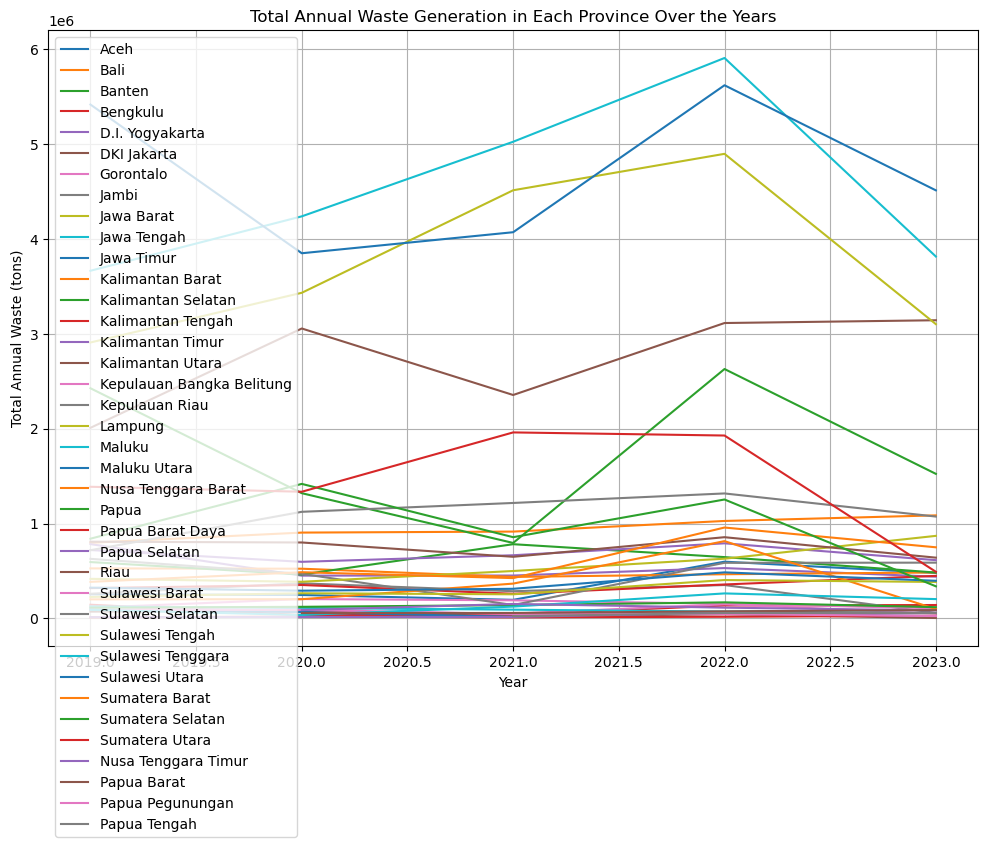

In [22]:
plt.figure(figsize=(12, 8))
for province in total_annual_waste['Provinsi'].unique():
    province_data = total_annual_waste[total_annual_waste['Provinsi'] == province]
    plt.plot(province_data['Tahun'], province_data['Timbulan Sampah Tahunan (ton)'], label=province)
plt.title('Total Annual Waste Generation in Each Province Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Annual Waste (tons)')
plt.legend()
plt.grid(True)
plt.show()

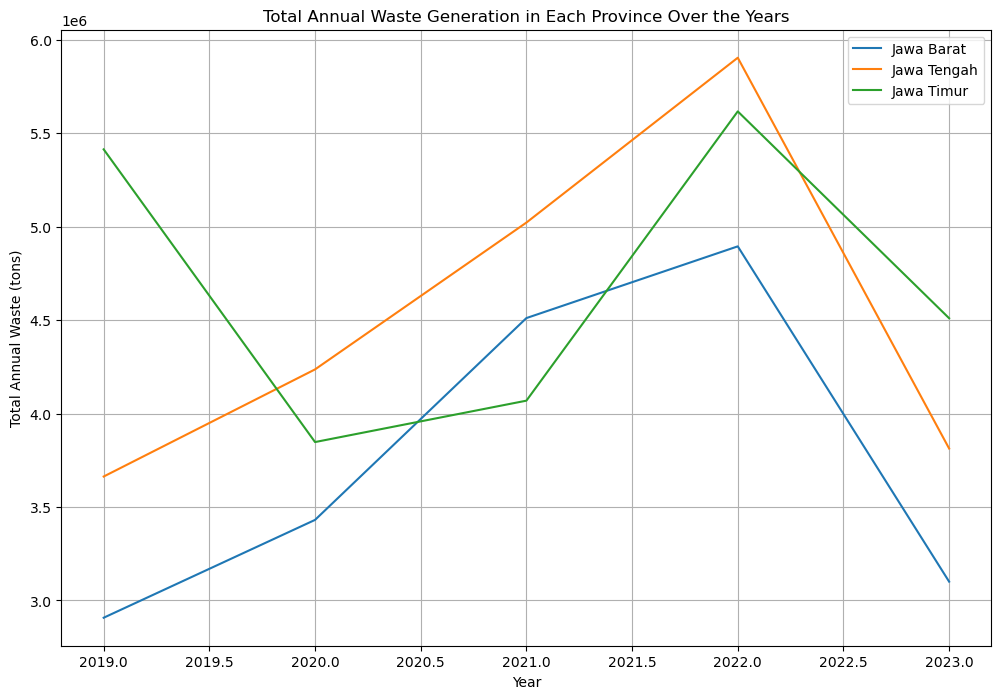

In [26]:
provinces_of_interest = ['Jawa Barat', 'Jawa Tengah', 'Jawa Timur']
filtered_data = total_annual_waste[total_annual_waste['Provinsi'].isin(provinces_of_interest)]

plt.figure(figsize=(12, 8))
for province in filtered_data['Provinsi'].unique():
    province_data = filtered_data[filtered_data['Provinsi'] == province]
    plt.plot(province_data['Tahun'], province_data['Timbulan Sampah Tahunan (ton)'], label=province)
plt.title('Total Annual Waste Generation in Each Province Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Annual Waste (tons)')
plt.legend()
plt.grid(True)
plt.show()

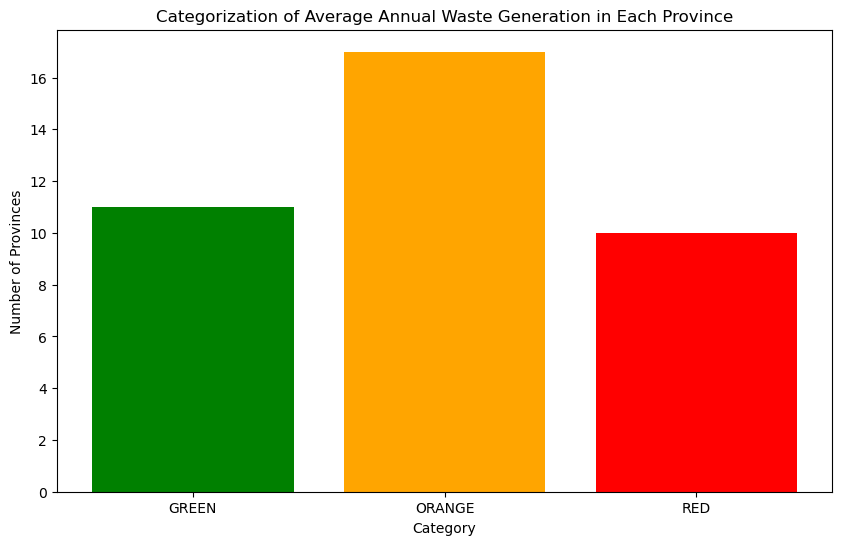

In [17]:
category_counts = average_annual_waste['Category'].value_counts().reindex(['GREEN', 'ORANGE', 'RED'], fill_value=0)
plt.figure(figsize=(10, 6))
plt.bar(category_counts.index, category_counts.values, color=['green', 'orange', 'red'])
plt.title('Categorization of Average Annual Waste Generation in Each Province')
plt.xlabel('Category')
plt.ylabel('Number of Provinces')
plt.show()

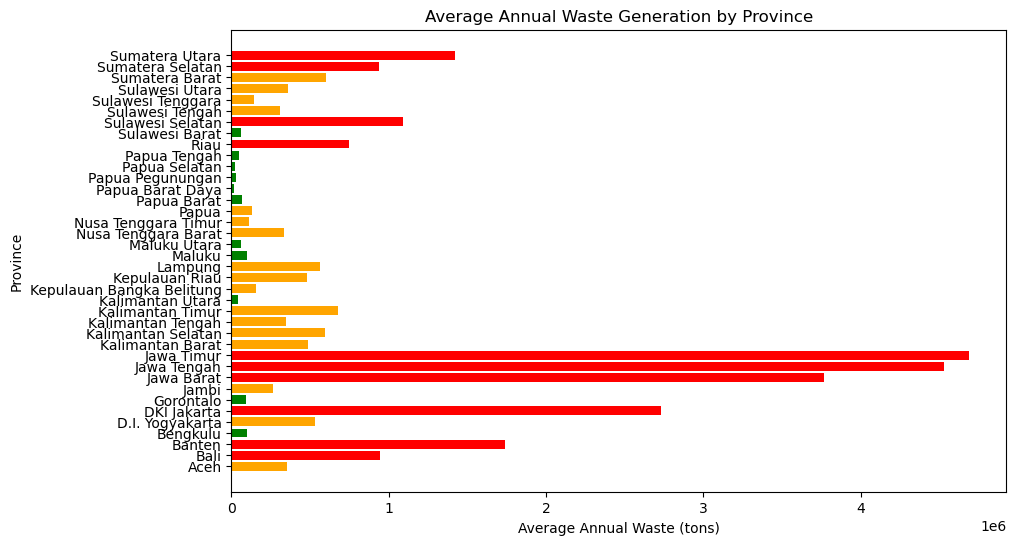

In [18]:
plt.figure(figsize=(10, 6))
plt.barh(average_annual_waste['Provinsi'], average_annual_waste['Average Annual Waste (ton)'], color=average_annual_waste['Category'].map({'GREEN': 'green', 'ORANGE': 'orange', 'RED': 'red'}))
plt.title('Average Annual Waste Generation by Province')
plt.ylabel('Province')
plt.xlabel('Average Annual Waste (tons)')
plt.show()